<a href="https://colab.research.google.com/github/laynz28/RCV-AI-COVER-ALL/blob/main/colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/log1stics/voice-generator-webui

## Start! (access PUBLIC URL)

In [ ]:
#@title make url


!nvidia-smi

# need reinstall cmake for pyopenjtalk
!pip uninstall -y cmake
!wget https://github.com/Kitware/CMake/releases/download/v3.22.1/cmake-3.22.1-linux-x86_64.tar.gz
!tar xf cmake-3.22.1-linux-x86_64.tar.gz
!rm cmake-3.22.1-linux-x86_64.tar.gz
!PATH=$PATH:/content/cmake-3.22.1-linux-x86_64/bin
import os
os.environ["PATH"] += ":/content/cmake-3.22.1-linux-x86_64/bin"

!apt-get install espeak

!git clone https://github.com/log1stics/voice-generator-webui
%cd voice-generator-webui
!chmod +x setup.sh
!./setup.sh


import os
import zipfile
import shutil
import urllib.request

BASE_DIR = os.getcwd()
rvc_models_dir = os.path.join(BASE_DIR, 'vc/models')

def extract_zip(extraction_folder, zip_name):
    os.makedirs(extraction_folder)
    with zipfile.ZipFile(zip_name, 'r') as zip_ref:
        zip_ref.extractall(extraction_folder)
    os.remove(zip_name)

    index_filepath, model_filepath = None, None
    for root, dirs, files in os.walk(extraction_folder):
        for name in files:
            if name.endswith('.index') and os.stat(os.path.join(root, name)).st_size > 1024 * 100:
                index_filepath = os.path.join(root, name)

            if name.endswith('.pth') and os.stat(os.path.join(root, name)).st_size > 1024 * 1024 * 40:
                model_filepath = os.path.join(root, name)

    if not model_filepath:
        raise Exception(f'No .pth model file was found in the extracted zip. Please check {extraction_folder}.')

    # move model and index file to extraction folder
    os.rename(model_filepath, os.path.join(extraction_folder, os.path.basename(model_filepath)))
    if index_filepath:
        os.rename(index_filepath, os.path.join(extraction_folder, os.path.basename(index_filepath)))

    # remove any unnecessary nested folders
    for filepath in os.listdir(extraction_folder):
        if os.path.isdir(os.path.join(extraction_folder, filepath)):
            shutil.rmtree(os.path.join(extraction_folder, filepath))

def download_online_model(url, dir_name):
    try:
        print(f'[~] Downloading voice model with name {dir_name}...')
        zip_name = url.split('/')[-1]
        extraction_folder = os.path.join(rvc_models_dir, dir_name)
        if os.path.exists(extraction_folder):
            raise Exception(f'Voice model directory {dir_name} already exists! Choose a different name for your voice model.')

        if 'pixeldrain.com' in url:
            url = f'https://pixeldrain.com/api/file/{zip_name}'

        urllib.request.urlretrieve(url, zip_name)

        print('[~] Extracting zip...')
        extract_zip(extraction_folder, zip_name)
        print(f'[+] {dir_name} Model successfully downloaded!')

    except Exception as e:
        raise Exception(str(e))

url = "https://pixeldrain.com/u/3tJmABXA" # @param {type:"string"}
dir_name = "Gura" # @param {type:"string"}

download_online_model(url, dir_name)


!python3 webui.py --colab

##  Restart (access PUBLIC URL) 再起動用

In [ ]:
!python3 webui.py --colab

# RVCモデルの追加方法

1. `Start! (access PUBLIC URL)`を実行後、①を押してフォルダ一覧を開く
2. `Start! (access PUBLIC URL)`を一旦停止し、`フォルダ作成コマンド`を実行後、②を押す  
3. ③のようにフォルダが作られてることを確認する
4. ③で作ったフォルダにpthファイルをドラッグ&ドロップしてアップロードして完了  
`Restart (access PUBLIC URL) 再起動用`を実行してVoice Conversion欄にRVCモデルが表示されていれば成功

わからない場合は[こちら](https://github.com/log1stics/voice-generator-webui/blob/main/docs/ja/README.md#rvc%E3%83%A2%E3%83%87%E3%83%AB%E3%81%AE%E8%BF%BD%E5%8A%A0)も参照


### フォルダ作成コマンド
AISO-HOWATTOの部分はpthファイルと同じになるように変更する  
`AISO-HOWATTO.pth`というpthファイルを追加したい場合は`AISO-HOWATTO`

In [ ]:
!mkdir -p vc/models/AISO-HOWATTO

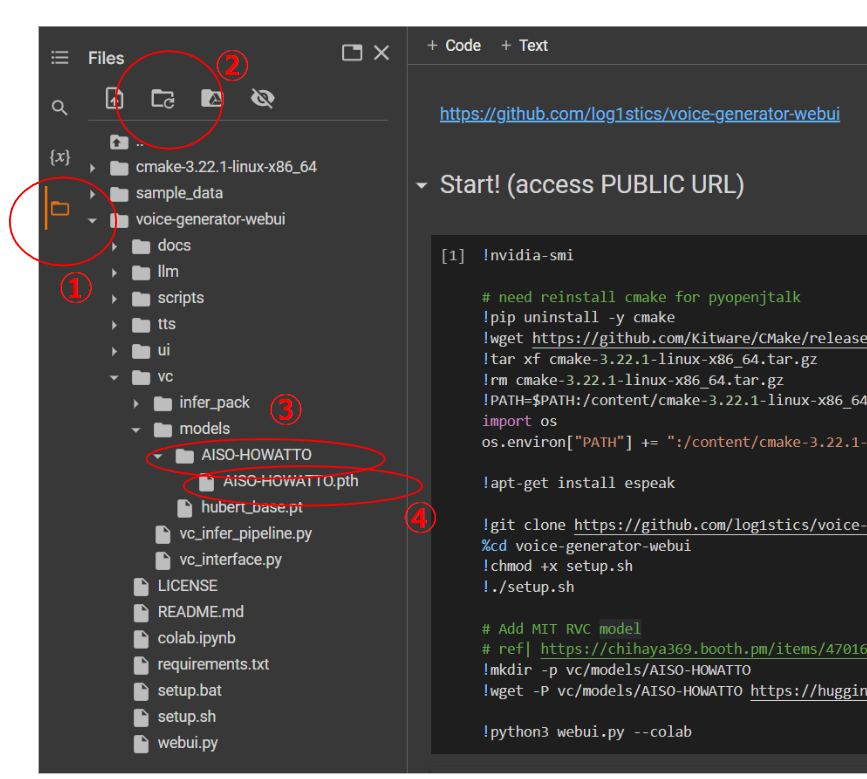